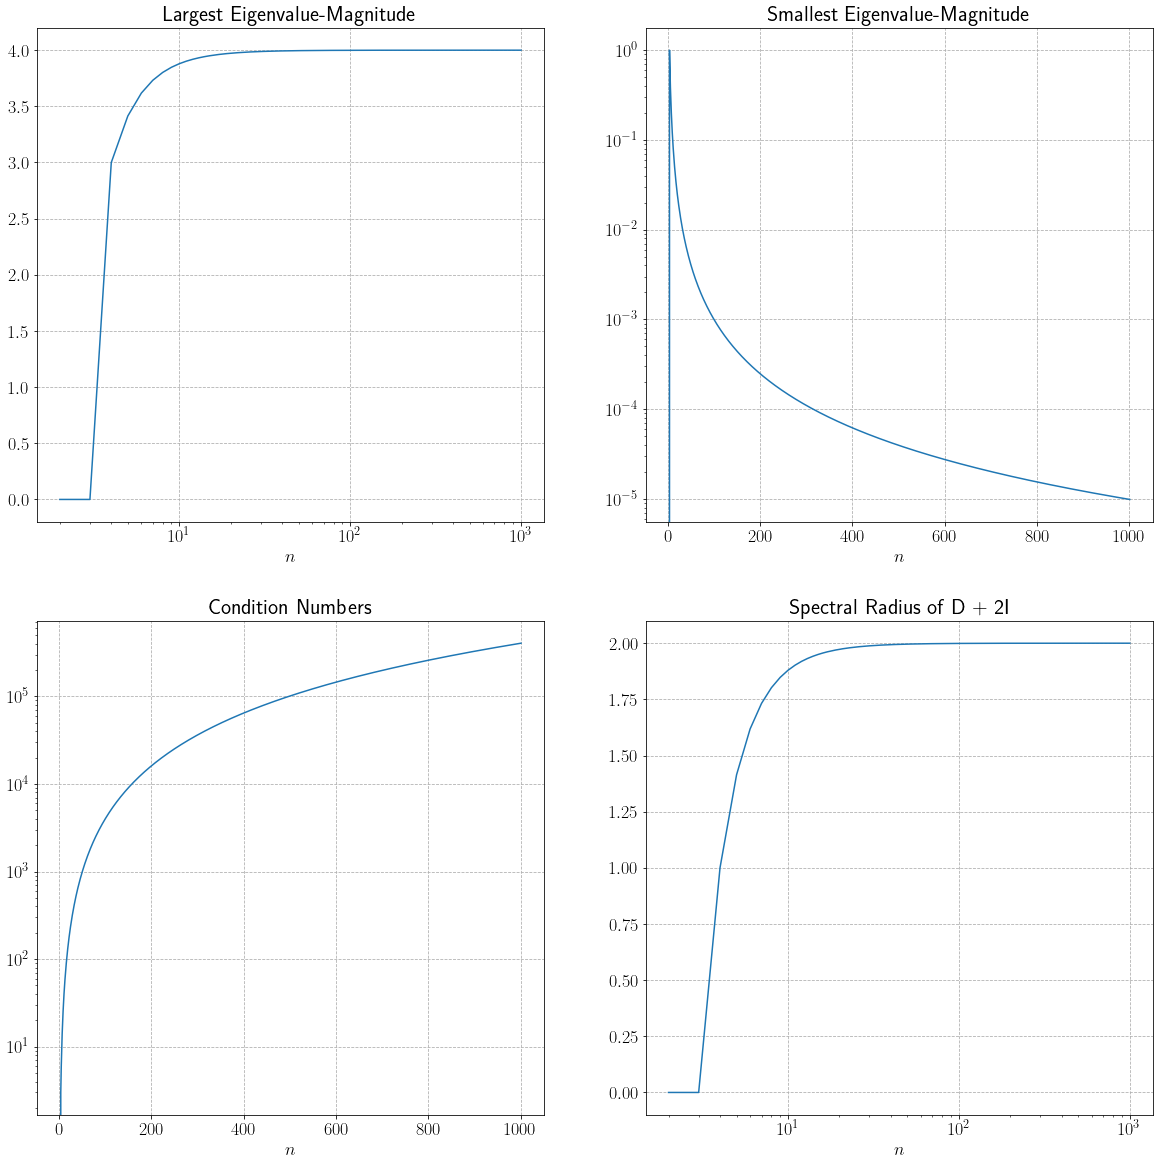

In [4]:
import sympy as sp
from sympy import pprint as print, Matrix
import numpy as np
import matplotlib.pyplot as plt

text_colors = {
    'jupyter': 'white',
    'regular': 'black'
}

mode = 'regular'
plot_params = {
    'axes.labelcolor': text_colors[mode],
    'xtick.color': text_colors[mode],
    'ytick.color': text_colors[mode],
    'text.usetex': True,
    'font.size': 18,
    'grid.linestyle': '--'
}

plt.rcParams.update(plot_params)

def Dn(n : int):
    D = np.eye(n,dtype=np.float64) * (-2)
    I = np.eye(n-1,dtype=np.float64)
    z1 = np.array([0]*n)
    z2 = np.array([0]*(n-1))
    
    botdiag = np.row_stack((np.column_stack((z2,I)),z1))
    topdiag = np.row_stack((z1,np.column_stack((I,z2))))
    return D + topdiag + botdiag
    
def analyze_matrix(n):
    D = Dn(n)
    eigvals = np.linalg.eigvalsh(D)
    eig_abs = np.abs(eigvals)
    l_max = np.max(eig_abs)
    l_min = np.min(eig_abs)
    cond_num = l_max / l_min
    D2 = D + 2 * np.eye(n)
    specrad = np.max(np.abs(np.linalg.eigvalsh(D2)))
    return l_max, l_min, cond_num, specrad
    
def plot_data(N : int):
    max_vals = np.array([0.0] * N)
    min_vals = np.array([0.0] * N)
    conds    = np.array([0.0] * N)
    rads     = np.array([0.0] * N)
    for n in range(2,N):
        ma, mi, co, rad = analyze_matrix(n)
        max_vals[n] = ma
        min_vals[n] = mi
        conds[n]    = co
        rads[n]     = rad

    fig, ax = plt.subplots(2,2)
    n_axis = np.arange(2,N+2,1)

    ax[0][0].semilogx(n_axis, max_vals)
    ax[0][0].set_title('Largest Eigenvalue-Magnitude')
    ax[0][0].set_xlabel(r'$n$')
    ax[0][0].grid()

    ax[0][1].semilogy(n_axis, min_vals)
    ax[0][1].set_title('Smallest Eigenvalue-Magnitude')
    ax[0][1].set_xlabel(r'$n$')
    ax[0][1].grid()

    ax[1][0].semilogy(n_axis, conds)
    ax[1][0].set_title('Condition Numbers')
    ax[1][0].set_xlabel(r'$n$')
    ax[1][0].grid()

    ax[1][1].semilogx(n_axis, rads)
    ax[1][1].set_title('Spectral Radius of D + 2I')
    ax[1][1].set_xlabel(r'$n$')
    ax[1][1].grid()

    fig.set_size_inches(20,20)
    plt.show()

def scatter_eigvals(N : int):
    fig, ax = plt.subplots()
    step = 1
    if N > 100:
        step = int(N / 50)
    for n in range(2,N,step):
        eigvals = np.linalg.eigvalsh(Dn(n))
        ax.scatter([n]*len(eigvals), eigvals)
    ax.grid()
    ax.set_xlabel(r'$n$');
    ax.set_ylabel(r'$\lambda$')
    ax.set_xticks(np.arange(2,N, int(N/10)))
    fig.set_size_inches(30,10)
    fig.suptitle(r'Eigenvalues of $\mathrm{D}_n$')
    plt.show()

#scatter_eigvals(100)
plot_data(1000)